In [1]:
import numpy as np
import keras
from keras.models import load_model
from createdatas2 import createdata1, createdata2
import csv
import datetime
import matplotlib.pyplot as plt
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)

Using TensorFlow backend.


現在時刻： 2020-11-05 16:54:50.645476


In [ ]:
#テストデータ作成
file_num = 20 #テストファイル数20
test_num = 1000 #データ数
data_size = 100 #配列の大きさ
fit_param_x = np.zeros((file_num, test_num, 4))
fit_param_y = np.zeros((file_num, test_num, 4))
NOISE = 30

x = np.zeros((file_num, test_num, data_size))
y = np.zeros((file_num, test_num, data_size))
t = np.zeros((file_num ,test_num, 3))
ty = np.zeros((file_num ,test_num, 3))

for k in range(file_num):
    createdata(test_num, NOISE, data_size, x[k], y[k], t[k], ty[k], fit_param_x[k], fit_param_y[k])

print(x.shape)

経過時間:2.2446279525756836[sec]
平均絶対誤差: 0.118710 ± 0.085718


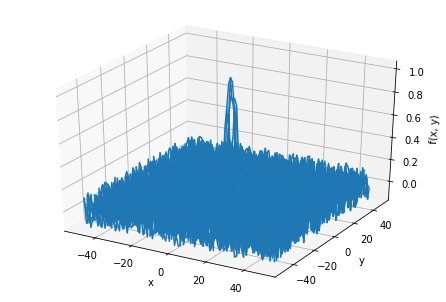

経過時間:2.371042013168335[sec]
平均絶対誤差: 0.120231 ± 0.085948


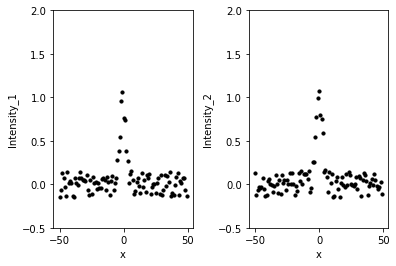

In [2]:
file_num = 20 #テストファイル数20
test_num = 1000 #データ数
data_size = 100 #配列の大きさ
fit_param_x = np.zeros((file_num, test_num, 4))
fit_param_y = np.zeros((file_num, test_num, 4))
NOISE = 30
x = np.zeros((file_num, test_num, data_size))
y = np.zeros((file_num, test_num, data_size))
t = np.zeros((file_num ,test_num, 3))
ty = np.zeros((file_num ,test_num, 3))

createdata1(test_num, NOISE, data_size, x[0], y[0], t[0], ty[0], fit_param_x[0], fit_param_y[0])

createdata2(test_num, NOISE, data_size, x[1], y[1], t[1], ty[1], fit_param_x[1], fit_param_y[1])
#表示
x_array = np.arange(-50, 50, 1.0)   
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.subplot(1,2,1)
plt.scatter(x_array, x[0][0],  color="black", label = 'x0 = 0.0', s=10)
plt.xlabel('x')          # 軸ラベル
plt.ylabel('Intensity_1')
plt.ylim(-0.5, 2.0)      # y軸の表示範囲
plt.subplot(1,2,2)
plt.scatter(x_array, x[1][0],  color="black", label = 'x0 = 0.0', s=10)
plt.xlabel('x')          # 軸ラベル
plt.ylabel('Intensity_2')
plt.ylim(-0.5, 2.0)
plt.show()
plt.close()

In [14]:
#学習パラメータの取得(CNN3)
pred_x = np.zeros((file_num ,test_num))
save_model_path = "/Users/nagaiyuma/Desktop/parameters/2020-10-16-cnn3.h5"
model = load_model(save_model_path)
cnn_error = np.zeros((file_num, test_num))
fit_error = np.zeros((file_num, test_num))

for k in range(file_num):
    xtest = x[k].reshape(-1, 100, 1)
    pred_x[k] = model.predict(xtest).T[1].flatten()
    cnn_error[k] = abs(pred_x[k] - t[k].T[1].flatten())
    fit_error[k] = abs(fit_param_x[k].T[1]-t[k].T[1].flatten()+1)
    

fit_ave = np.average(fit_error)
fit_std = np.std(fit_error)
fit_mae = "fit平均絶対誤差: %f ± %f" % (fit_ave, fit_std)
print(fit_mae)
    
cnn_ave = np.average(cnn_error)
cnn_std = np.std(cnn_error)
cnn_mae = "cnn平均絶対誤差: %f ± %f" % (cnn_ave, cnn_std)
print(cnn_mae)

fit平均絶対誤差: 0.117371 ± 0.086983
cnn平均絶対誤差: 0.211132 ± 0.139615


In [4]:
save_cnn = "/Users/nagaiyuma/Desktop/maindata/"+date+"pred_x.csv"
save_fit = "/Users/nagaiyuma/Desktop/maindata/"+date+"fit.csv"

#結果の保存
with open(save_cnn,'w') as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerows(pred_x)
with open(save_fit,'w') as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerows(fit_param_x[:,:,1])

print(pred_x.shape)
print(fit_param_x[:,:,1].shape)

(20, 1000)
(20, 1000)


In [3]:
#学習パラメータの取得(CNN1)
pred_x = np.zeros((file_num ,test_num))
save_model_path = "/Users/nagaiyuma/Desktop/parameters/noise30-cnn1.h5"
model = load_model(save_model_path)
cnn_error = np.zeros((file_num, test_num))
fit_error = np.zeros((file_num, test_num))

for k in range(file_num):
    xtest = x[k].reshape(-1, 100, 1)
    pred_x[k] = model.predict(xtest).flatten()
    cnn_error[k] = abs(pred_x[k] - t[k].T[1].flatten())
    fit_error[k] = abs(fit_param_x[k].T[1]-t[k].T[1].flatten()+1)

fit_ave = np.average(fit_error)
fit_std = np.std(fit_error)
fit_mae = "fit平均絶対誤差: %f ± %f" % (fit_ave, fit_std)
print(fit_mae)
    
cnn_ave = np.average(cnn_error)
cnn_std = np.std(cnn_error)
cnn_mae = "cnn平均絶対誤差: %f ± %f" % (cnn_ave, cnn_std)
print(cnn_mae)



fit平均絶対誤差: 1.000000 ± 0.000000
cnn平均絶対誤差: 0.522951 ± 0.081293


In [7]:
save_cnn = "/Users/nagaiyuma/Desktop/maindata/"+date+"pred_x1.csv"

#結果の保存
with open(save_cnn,'w') as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerows(pred_x)

print(pred_x.shape)

(20, 1000)


In [12]:
print(fit_param_x[0].T[1].flatten())

[-1.11264543e+00 -9.63616927e-01 -8.79715574e-01 -8.07244099e-01
 -1.08081697e+00 -1.34307498e+00 -9.93783954e-01 -9.99975422e-01
 -9.56809902e-01 -1.12031999e+00 -1.21675188e+00 -1.48777407e+00
 -9.32093618e-01 -9.18491383e-01 -7.98756726e-01 -8.86333636e-01
 -1.00460607e+00 -1.07191792e+00 -7.40542615e-01 -1.08741464e+00
 -8.91598611e-01 -7.88568589e-01 -1.15823848e+00 -9.16491421e-01
 -9.08744995e-01 -9.08517383e-01 -9.85108466e-01 -1.22023595e+00
 -8.53744346e-01 -1.20959778e+00 -1.12323606e+00 -1.16352201e+00
 -7.25572486e-01 -8.97055691e-01 -9.04999299e-01 -7.64017275e-01
 -1.02342255e+00 -1.17308674e+00 -9.09863080e-01 -9.56885337e-01
 -9.27635636e-01 -1.05433883e+00 -9.48908383e-01 -9.45717484e-01
 -8.37479451e-01 -9.80123053e-01 -1.00285805e+00 -9.40122117e-01
 -1.13765622e+00 -1.21652345e+00 -1.13595646e+00 -8.55841908e-01
 -6.90966525e-01 -1.14660045e+00 -1.13078600e+00 -7.32563916e-01
 -9.11217640e-01 -9.60840897e-01 -8.98878356e-01 -9.70361427e-01
 -6.22229561e-01 -8.13574